In [1]:
import sys; sys.path.append("../src")
from datasets import load_dataset
import numpy as np
from data import DataLoader
from layers import Linear, Module, Sequential, ReLU, Flatten, Conv2D, MaxPool, BatchNorm2D
from activations import softmax
from losses import CategoricalCrossEntropy
from optimizers import Adam
from data import DataLoader
from utils import Trainer
from metrics import categoricalAccuracy
import matplotlib.pyplot as plt

In [2]:
mnist = load_dataset("ylecun/mnist")

In [3]:
def onehot(label):
    out = np.zeros((10,))
    out[label] = 1
    return out

train_data = DataLoader(
    inputs = [ np.expand_dims(np.array(mnist["train"][i]["image"])/255.0, axis=0) for i in range(500) ],
    labels = [ onehot(mnist["train"][i]["label"]) for i in range(500) ],
    batch_size = 32
)

val_data = DataLoader(
    inputs = [ np.expand_dims(np.array(mnist["train"][i]["image"])/255.0, axis=0) for i in range(2000, 2250) ],
    labels = [ onehot(mnist["train"][i]["label"]) for i in range(2000, 2250) ],
    batch_size = 1
)

---

In [8]:
class MNISTClassifier1(Module):
    def __init__(self):
        self.conv_block = Sequential([
            Conv2D(in_channels=1, out_channels=8, kernel_size=5, stride=2, padding="valid", initializer="he"),
            ReLU(),
            Conv2D(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding="valid", initializer="he"),
            ReLU(),
            MaxPool(in_channels=8, kernel_size=2, stride=2),
        ])
        self.flatten = Flatten()
        self.ff_block = Sequential([
            Linear(200, 10)
        ])
    
    def __call__(self, x):
        x = self.conv_block(x)
        x = self.flatten(x)
        x = self.ff_block(x)
        return softmax(x)

In [9]:
np.random.seed(42)
model = MNISTClassifier1()
print("Total parameters:", np.sum([len(p) for p in model.parameters()]))

history = Trainer(
    model = model,
    loss = CategoricalCrossEntropy(label_smoothing=0.001),
    optimizer = Adam(model.parameters(), 1e-3),
    train_data = train_data,
    val_data = val_data,
    metrics = [("accuracy", categoricalAccuracy)]
).train(10)

Total parameters: 2802


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 | train_loss: 2.2790 train_accuracy: 0.1750 || val_loss: 2.2449 val_accuracy: 0.2560
Epoch 1 | train_loss: 2.1843 train_accuracy: 0.4167 || val_loss: 2.1373 val_accuracy: 0.4520
Epoch 2 | train_loss: 2.0342 train_accuracy: 0.6062 || val_loss: 1.9499 val_accuracy: 0.5400
Epoch 3 | train_loss: 1.7780 train_accuracy: 0.7125 || val_loss: 1.6392 val_accuracy: 0.5840
Epoch 4 | train_loss: 1.3952 train_accuracy: 0.7104 || val_loss: 1.2604 val_accuracy: 0.6640
Epoch 5 | train_loss: 1.1404 train_accuracy: 0.6979 || val_loss: 1.2252 val_accuracy: 0.6120
Epoch 6 | train_loss: 1.2312 train_accuracy: 0.6438 || val_loss: 1.5296 val_accuracy: 0.6280
Epoch 7 | train_loss: 1.4943 train_accuracy: 0.6375 || val_loss: 1.7587 val_accuracy: 0.6200
Epoch 8 | train_loss: 1.7736 train_accuracy: 0.6562 || val_loss: 2.6693 val_accuracy: 0.5880
Epoch 9 | train_loss: 2.6847 train_accuracy: 0.6500 || val_loss: 4.9689 val_accuracy: 0.5000


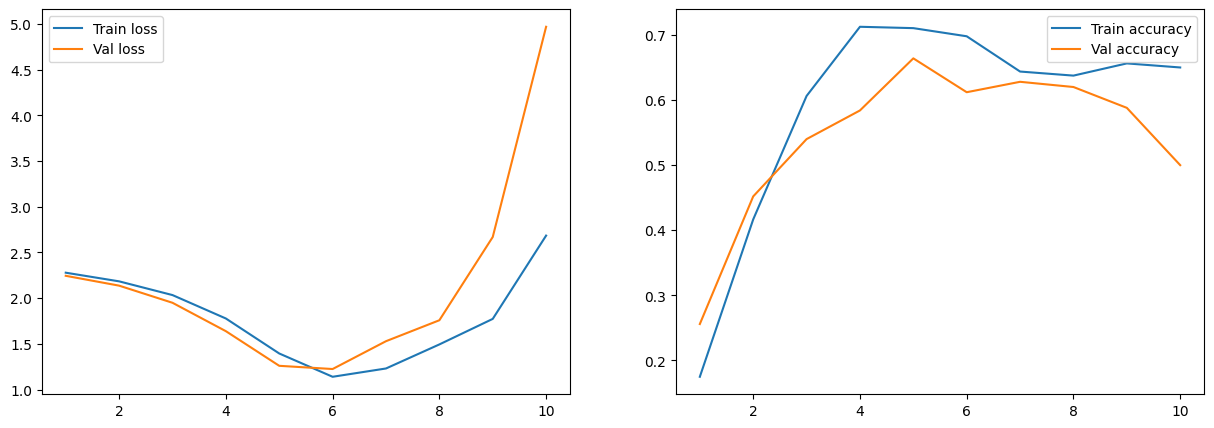

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([h["epoch"] for h in history], [h["train_loss"] for h in history], label="Train loss")
plt.plot([h["epoch"] for h in history], [h["val_loss"] for h in history], label="Val loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h["epoch"] for h in history], [h["train_metrics"][0] for h in history], label="Train accuracy")
plt.plot([h["epoch"] for h in history], [h["val_metrics"][0] for h in history], label="Val accuracy")
plt.legend()
plt.show()

---

In [ ]:
class MNISTClassifier2(Module):
    def __init__(self):
        self.conv_block = Sequential([
            Conv2D(in_channels=1, out_channels=8, kernel_size=5, stride=2, padding="valid", initializer="he"),
            BatchNorm2D(in_channels=8),
            ReLU(),
            Conv2D(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding="valid", initializer="he"),
            BatchNorm2D(in_channels=8),
            ReLU(),
            MaxPool(in_channels=8, kernel_size=2, stride=2),
        ])
        self.flatten = Flatten()
        self.ff_block = Sequential([
            Linear(200, 10)
        ])
    
    def __call__(self, x):
        x = self.conv_block(x)
        x = self.flatten(x)
        x = self.ff_block(x)
        return softmax(x)

In [6]:
np.random.seed(42)
model = MNISTClassifier2()
print("Total parameters:", np.sum([len(p) for p in model.parameters()]))

history = Trainer(
    model = model,
    loss = CategoricalCrossEntropy(label_smoothing=0.001),
    optimizer = Adam(model.parameters(), 1e-3),
    train_data = train_data,
    val_data = val_data,
    metrics = [("accuracy", categoricalAccuracy)]
).train(10)

Total parameters: 2806

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 | train_loss: 2.2739 train_accuracy: 0.1792 || val_loss: 2.1665 val_accuracy: 0.1840
Epoch 1 | train_loss: 2.0061 train_accuracy: 0.3896 || val_loss: 1.8899 val_accuracy: 0.4520
Epoch 2 | train_loss: 1.7982 train_accuracy: 0.5563 || val_loss: 1.6720 val_accuracy: 0.5680
Epoch 3 | train_loss: 1.6266 train_accuracy: 0.6979 || val_loss: 1.5058 val_accuracy: 0.6400
Epoch 4 | train_loss: 1.5452 train_accuracy: 0.6896 || val_loss: 1.3703 val_accuracy: 0.6760
Epoch 5 | train_loss: 1.4770 train_accuracy: 0.7396 || val_loss: 1.3289 val_accuracy: 0.6520
Epoch 6 | train_loss: 1.4431 train_accuracy: 0.7312 || val_loss: 1.3071 val_accuracy: 0.6800
Epoch 7 | train_loss: 1.4077 train_accuracy: 0.7208 || val_loss: 1.2693 val_accuracy: 0.6600
Epoch 8 | train_loss: 1.3597 train_accuracy: 0.7229 || val_loss: 1.2668 val_accuracy: 0.6680
Epoch 9 | train_loss: 1.3248 train_accuracy: 0.7292 || val_loss: 1.2142 val_accuracy: 0.6760


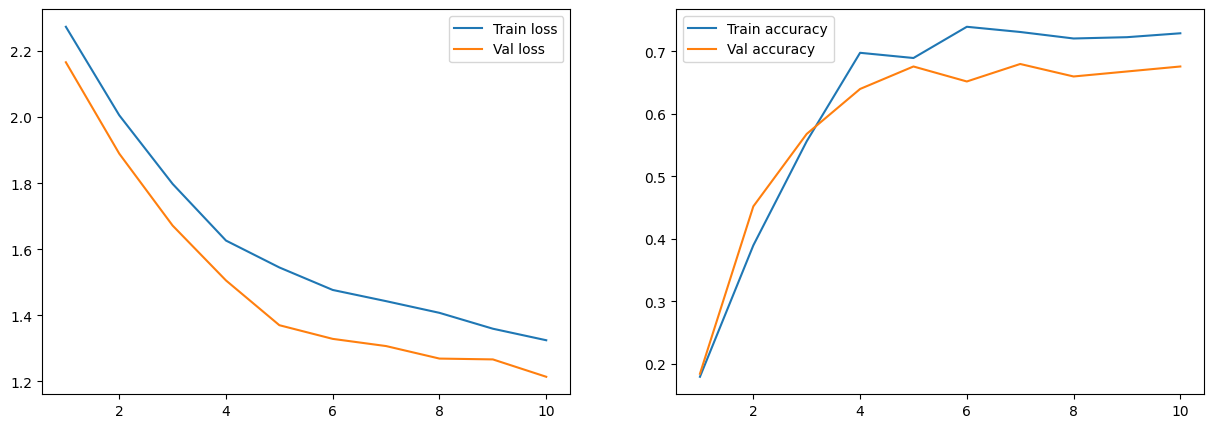

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([h["epoch"] for h in history], [h["train_loss"] for h in history], label="Train loss")
plt.plot([h["epoch"] for h in history], [h["val_loss"] for h in history], label="Val loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h["epoch"] for h in history], [h["train_metrics"][0] for h in history], label="Train accuracy")
plt.plot([h["epoch"] for h in history], [h["val_metrics"][0] for h in history], label="Val accuracy")
plt.legend()
plt.show()